**2019123272 최연수**

> 풀이 과정에서 나오는 모든 값들은 소수 넷째 자리에서 반올림하여 표기하였습니다.

**12.20 다음은 흡연 여부와 심장병 여부에 대한 자료이다.**


**a. 두 변수의 관련성에 대해 검정하여라**

우선 주어진 자료를 R코드로 나타내면 다음과 같다. 

In [10]:
# Assigning data

obs <- matrix(c(10, 24, 30, 60), nrow=2, ncol=2, byrow = T)
dimnames(obs) <- list( c("흡연", "비흡연"), c("있음","없음"))
obs

,있음,없음
흡연,10,24
비흡연,30,60


'흡연 여부'와 '심장병 여부' 간의 관련성을 검정하기 위한 가설은 다음과 같다.
***
H0: '흡연 여부'와 '심장병 여부'는 독립이다.

H1: '흡연 여부'와 '심장병 여부'는 독립이 아니다.
***

귀무가설이 사실이라는 가정 하에서 결합확률을 추정하면 다음과 같다.

$$
\pi_{ij} = \pi_{i}\cdot\pi_{j}
$$

In [11]:
# Probability

margin.col <- c(40, 84)
margin.row <- c(34, 90)

margin.col.prob <- margin.col/124
margin.row.prob <- margin.row/124

joint.prob <- margin.row.prob %o% margin.col.prob
dimnames(joint.prob) <- list( c("흡연", "비흡연"), c("있음","없음"))
joint.prob

,있음,없음
흡연,0.08844953,0.1857440
비흡연,0.23413111,0.4916753


이 결합확률에 전체 표본수 124를 곱해 구한 기댓값는 다음과 같다.

In [12]:
# Calculating exp

(exp <- joint.prob * 124)

,있음,없음
흡연,10.96774,23.03226
비흡연,29.03226,60.96774


카이제곱합을 구하면 다음과 같다.

In [13]:
# Calculating chisq

chisq <- (obs-exp)^2 / exp
(sum.chisq <- sum(chisq))

[1] 0.1736695

이에 따라 p값을 구하면 다음과 같다.

In [14]:
# Calculating p.value

df = (nrow(obs) - 1) * (ncol(obs) - 1)
round(p.value <- 1 - pchisq(sum(chisq), df),4)

# Testing 

chisq.test(obs, correct=F)

[1] 0.6769


	Pearson's Chi-squared test

data:  obs
X-squared = 0.17367, df = 1, p-value = 0.6769


p값은 0.6769다. 따라서 검정 유의수준 5% 하에서 귀무가설은 기각될 수 없다. 즉, 두 변수 '흡연 여부'와 '심장병 여부'가 독립이 아니라고 볼 수 없다. 이는 두 변수 간에는 큰 관련성이 없음을 의미한다. 

주어진 자료를 막대그래프로 나타내면 '심장병 여부'와 **관계 없이** '비흡연'에 해당되는 관찰빈도가 더 많다는 것을 확인할 수 있다. 

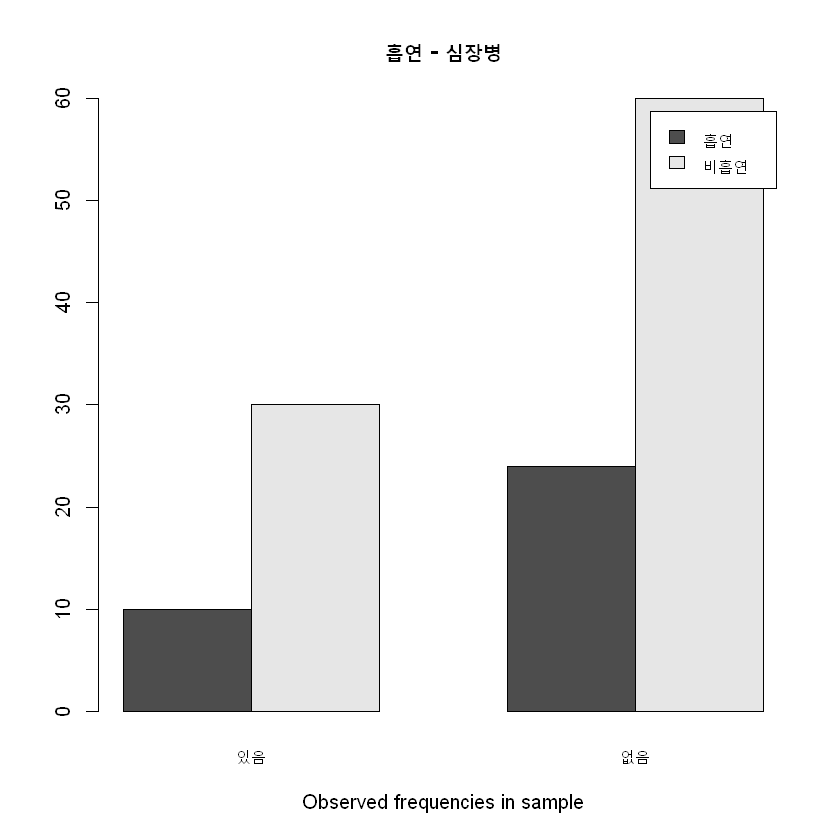

In [15]:
# Visualization

barplot(obs, beside = TRUE, legend = TRUE, main = "흡연 - 심장병", xlab = "Observed frequencies in sample")

두 변수 간 관련성이 없음은 동질성 검정을 통해서도 확인할 수 있다. 동질성 검정을 위한 가설은 다음과 같이 설정할 수 있다. 

***
H0: '흡연'집단과 '비흡연'집단의 '심장병 여부'에 대한 분포는 같다.

H1: '흡연'집단과 '비흡연'집단의 '심장병 여부'에 대한 분포는 다르다.
***


귀무가설이 참이라는 가정하에서 '심장병 여부'에 대한 확률을 추정하면 다음과 같다.

$$
\hat{p_{심장병있음}} = \frac{(10+30)}{124}
$$

$$
\hat{p_{심장병없음}} = \frac{(24+60)}{124}
$$

In [16]:
# Probability

round(prob.yes <- sum(obs[,1])/sum(obs),4)
round(prob.no <- sum(obs[,2])/sum(obs),4)

[1] 0.3226

[1] 0.6774

이에 두 집단의 표본수를 곱하여 구한 기댓값은 다음과 같다. 

In [17]:
# Calculating exp

exp.smoke <- c(prob.yes*34, prob.no*34)
exp.dont_smoke <- c(prob.yes*90, prob.no*90)

exp <- rbind(exp.smoke, exp.dont_smoke)
dimnames(exp) <- list( c("흡연", "비흡연"), c("있음","없음"))
exp

,있음,없음
흡연,10.96774,23.03226
비흡연,29.03226,60.96774


이때 독립성과 동질성의 서로 다른 가정하에서 구한 기댓값이 **서로 같은 값**이 됨을 확인할 수 있다. 서로 다른 이론적인 틀에서 출발했지만 두 검정의 결과는 같아진다. 

**b. 심장병에 따른 흡연비율은 각각 10/40=0.25, 24/84=0.29이다. 이 비율 간의 통계적 차이가 있는지를 z-test로 검정하여라. 또한 이 결과를 문제 a에서의 카이제곱검정 결과와 비교하여라.**


'심장병 있음' 집단의 흡연률을 $p_{1}$, '심장병 없음' 집단의 흡연률을 $p_{2}$라 할 때, 두 비율 간의 통계적 차이를 검정하기 위한 가설은 다음과 같이 설정할 수 있다.
***
H0: 심장병 여부에 따른 두 흡연비율 간에는 차이가 없다. ($p_{1} = p_{2}$)

H1: 심장병 여부에 따른 두 흡연비율 간에는 차이가 있다. ($p_{1}\neq p_{2}$)
***

두 비율 차이의 추정량은 대표본인 경우 근사적으로 정규분포를 따른다. 대표본을 만족하기 위해선 $n_{1}p_{1}, n_{1}(1-p_{1}), n_{2}p_{2}, n_{2}(1-p_{2})$가 모두 5보다 크거나 같아야한다. 이 경우 해당 값들이 모두 5보다 크다. 따라서 두 흡연비율의 차이는 근사적으로 정규분포를 따른다고 판단할 수 있다. 

귀무가설하에서의 Z 검정통계량을 구하면 다음과 같다. 

In [18]:
p1 <- 10/40
p2 <- 24/84
p <- (10+24)/(40+84)

x <- p1-p2
y <- p*(1-p)*((1/40)+(1/84))

round((z.stat <- x / sqrt(y)),4)

[1] -0.4167

z 검정통계량은 -0.4167이다. 이때 대립가설은 $p_{1}\neq p_{2}$이므로 양측검정을 수행해야 한다. 이에 따라 유의수준 5%에서의 기각역은 다음과 같다. 

$$
\left| z \right| > z_{0.025} = 1.96
$$

따라서 유의수준 5%에서 귀무가설은 기각되지 않는다. 즉, 심장병 여부에 따른 두 흡연비율 간에는 차이가 없지 않다고 볼 수 없다. 이는 앞서 독립성, 동질성 검정을 통해 도출한 결과와 같다. 두 비율 간에 차이가 없다는 것은 두 변수 '심장병 여부'와 '흡연 여부'는 크게 관련성이 없다는 것을 의미하기 때문이다. 

**12.26 한 연구자가 대학에 재학 중인 1 ~ 4학년 학부생 중 랜덤하게 선정된 학생들에게 졸업 후의 진로에 대하여 설문조사를 하였는데, 다음과 같이 정리되었다. 대학 학년과 졸업 후 진로에 대한 계획 사이에는 어떤 연관성이 있는지의 여부를 알아 보기 위해 유의수준 1%에서 통계적 검정을 수행하라.**

우선 주어진 자료를 R코드로 나타내면 다음과 같다.

In [19]:
# Assigning data

obs <- matrix(c(22, 20, 48, 37, 26, 29, 58, 31, 15, 56, 35, 9), nrow = 4, ncol = 3, byrow = TRUE)
dimnames(obs) <- list(c("1학년","2학년","3학년","4학년"),c("취직", "대학원 진학", "미결정"))
obs

,취직,대학원 진학,미결정
1학년,22,20,48
2학년,37,26,29
3학년,58,31,15
4학년,56,35,9


두 변수 '대학 학년'과 '졸업 후 진로' 간의 관련성을 검정하기 위한 가설은 다음과 같다.
***
H0: 두 변수 '대학 학년'과 '졸업 후 진로'는 독립이다.

H1: 두 변수 '대학 학년'과 '졸업 후 진로'는 독립이 아니다.
***

귀무가설이 참이라는 가정하에서 결합확률을 추정하면 다음과 같다. 


In [21]:
# Joint probability

margin.row <- c()
for (i in  1:4){
margin.row[i] <- sum(obs[i,])
}

margin.col <- c()
for (i in  1:3){
margin.col[i] <- sum(obs[,i])
}

margin.row.prob <- margin.row / sum(margin.row)
margin.col.prob <- margin.col / sum(margin.col)

joint.prob <- margin.row.prob %o% margin.col.prob
dimnames(joint.prob) <- list(c("1학년","2학년","3학년","4학년"), c("취직", "대학원 진학", "미결정"))
joint.prob

,취직,대학원 진학,미결정
1학년,0.1044994,0.06765282,0.06100835
2학년,0.1068217,0.06915622,0.06236409
3학년,0.1207549,0.07817660,0.07049854
4학년,0.1161105,0.07516980,0.06778705


추정한 결합확률에 전체 표본수를 곱해 구한 기댓값은 다음과 같다.

In [24]:
# Calculating exp

(exp <- joint.prob * sum(margin.col))

,취직,대학원 진학,미결정
1학년,40.33679,26.11399,23.54922
2학년,41.23316,26.69430,24.07254
3학년,46.61140,30.17617,27.21244
4학년,44.81865,29.01554,26.16580


카이제곱합을 구하면 다음과 같다.

In [25]:
# Calculating chisq

chisq <- (obs-exp)^2/exp
(sum.chisq <- sum(chisq))

[1] 60.18637

p값을 구하면 다음과 같다.

In [26]:
# Calculating p.value

df = (nrow(obs)-1) * (ncol(obs)-1)
(p.value <- 1 - pchisq(sum.chisq, df))

# Testing

(x <- chisq.test(obs, correct=F))

[1] 4.1252e-11


	Pearson's Chi-squared test

data:  obs
X-squared = 60.186, df = 6, p-value = 4.125e-11


이때 p값은 4.125e-11로, 매우 작다. 따라서 유의수준 1%에서 귀무가설은 기각된다. 즉, 두 변수 '대학 학년'과 '졸업 후 진로에 대한 계획'은 독립이 아니다. 

주어진 자료를 막대그래프로 나타내면 다음과 같다. 만약 두 변수가 독립이라면 세 집단 '취직', '대학원 진학', '미결정'의 표본들의 분포는 같을 것이다. 그러나 그래프를 통해 확인할 수 있듯, 세 집단의 분포는 다르다. 이는 두 변수 '대학 학년'과 '졸업 후 진로에 대한 계획' 간에는 일정한 연관성이 있음을 의미한다고 해석할 수 있다. 

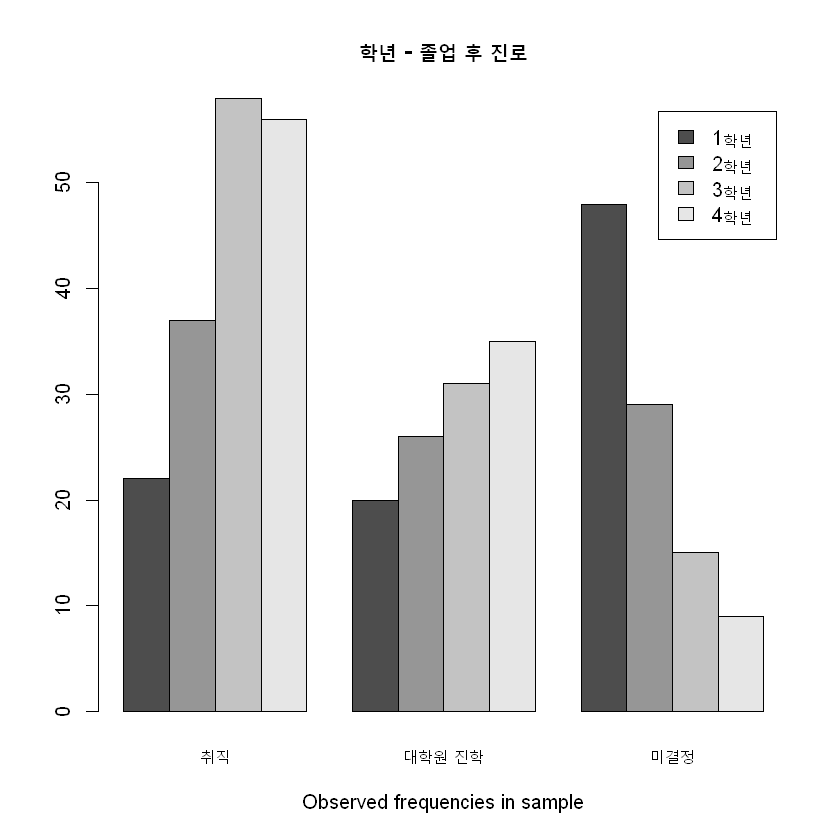

In [28]:
# Visualization

barplot(obs, beside = TRUE, legend = TRUE, main = "학년 - 졸업 후 진로", xlab = "Observed frequencies in sample")

**12.28 식당 내의 배경음악이 고객의 소비행태에 영향을 줄 수 있다는 연구결과가 있다. 한 마케팅 전문가가 배경음악이 고객의 소비행태에 어떠한 영향을 주는지 알아보기 위해 실험을 진행하였다. 이 실험에서 3개의 배경음악(발라드, 댄스, 배경음악 없음)이 고려되었고, 각 배경음악하에서 고객들이 어떠한 종류의 술을 주문하는지 조사하였다. 유의수준 5%에서 배경음악과 주문한 술의 종류 간의 독립성을 검정하여라.**

주어진 자료를 R코드로 나타내면 다음과 같다.

In [29]:
# Assigning data

obs <- matrix(c(30,26,39,19,31,43,35,34,22), nrow = 3, ncol = 3, byrow = T)
dimnames(obs) <- list(c("맥주", "소주", "다른 종류"), c("발라드", "댄스", "배경음악 없음"))
obs

,발라드,댄스,배경음악 없음
맥주,30,26,39
소주,19,31,43
다른 종류,35,34,22


두 변수 '배경음악'과 '술의 종류' 간의 독립성을 검정하기 위한 가설은 다음과 같이 설정할 수 있다. 

***
H0: 두 변수 '배경음악'과 '술의 종류'는 독립이다.

H1: 두 변수 '배경음악'과 '술의 종류'는 독립이 아니다.
***

귀무가설이 참이라는 가정하에서 결합확률을 추정하면 다음과 같다. 

In [34]:
# Joint probability

margin.row <- c()
for (i in  1:3){
margin.row[i] <- sum(obs[i,])
}

margin.col <- c()
for (i in  1:3){
margin.col[i] <- sum(obs[,i])
}

margin.row.prob <- margin.row / sum(margin.row)
margin.col.prob <- margin.col / sum(margin.col)

joint.prob <- margin.row.prob %o% margin.col.prob
dimnames(joint.prob) <- list(c("맥주", "소주", "다른 종류"), c("발라드", "댄스", "배경음악 없음"))
joint.prob

,발라드,댄스,배경음악 없음
맥주,0.10251667,0.1110597,0.1269254
소주,0.10035842,0.1087216,0.1242533
다른 종류,0.09820018,0.1063835,0.1215812


추정한 결합확률에 전체 표본수를 곱해 구한 기댓값은 다음과 같다.

In [35]:
# Calculating exp

(exp <- joint.prob * sum(margin.col))

,발라드,댄스,배경음악 없음
맥주,28.60215,30.98566,35.41219
소주,28.00000,30.33333,34.66667
다른 종류,27.39785,29.68100,33.92115


카이제곱합을 구하면 다음과 같다. 

In [36]:
# Calculating chisq

chisq <- (obs-exp)^2/exp
(sum.chisq <- sum(chisq))

[1] 13.07213

p값을 구하면 다음과 같다.

In [37]:
# Calculating p.value

df <- (nrow(obs) - 1)*(ncol(obs) - 1)
round(p.value <- 1 - pchisq(sum.chisq, df),4)

[1] 0.0109

p값은 0.0109이다. 따라서 유의수준 5%에서 귀무가설은 기각된다. 즉, 두 변수 '배경음악'과 '술의 종류'는 독립이 아니다. 

주어진 자료를 막대그래프로 나타내면 다음과 같다. 만약 두 변수가 독립이라면 세 집단 '발라드', '댄스', '배경음악 없음'의 표본들의 분포는 같을 것이다. 그러나 그래프를 통해 확인할 수 있듯, 세 집단의 분포는 다르다. 이는 두 변수 '배경음악'과 '술의 종류' 간에는 일정한 연관성이 있음을 의미한다고 해석할 수 있다. 

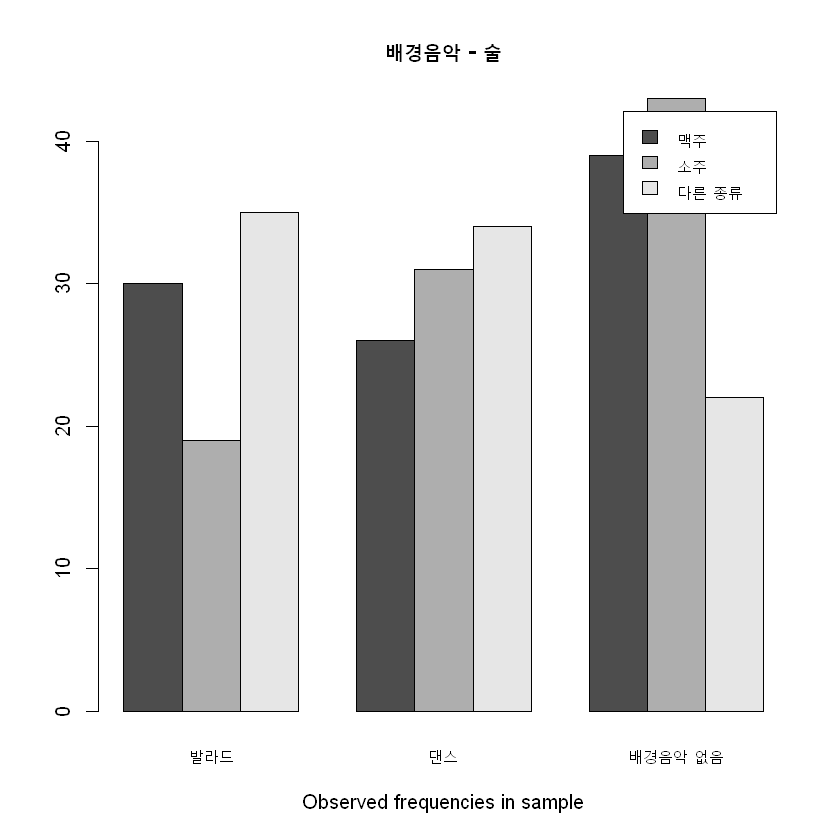

In [38]:
# Visualization

barplot(obs, beside = TRUE, legend = TRUE, main = "배경음악 - 술", xlab = "Observed frequencies in sample")

**12.32 한 고등학생이 대학교 진학을 앞두고 두 대학의 상경대학 중에서 취업률이 높은 곳에 지원하기를 원한다. 다음은 올해 두 대학의 상경대학을 졸업한 학생들의 취업률 자료이다.**

우선 주어진 자료를 R코드로 나타내면 다음과 같다. 

In [2]:
# Assigning data

obs <- matrix(c(257,143,262,136), nrow=2, ncol=2, byrow = T)
dimnames(obs) <- list(c("대학교 1 상경대학", "대학교 2 상경대학"), c("취업", "미취업"))
obs

,취업,미취업
대학교 1 상경대학,257,143
대학교 2 상경대학,262,136


**a. 상경대학별 취업률을 계산하고 이 고등학생이 어느 대학을 지원할지에 대해 설명하여라.** 

In [3]:
round((uni_1.prob <- obs[1,1] / sum(obs[1,])) * 100,4)
round((uni_2.prob <- obs[2,1] / sum(obs[2,]))*100,4)

[1] 64.25

[1] 65.8291

대학교 1 상경대학의 취업률은 64.25%, 대학교 2 상경대학의 취업률은 65.8291%이다.따라서 취업률이 더 높은 대학교 2에 지원할 것이다.

**b. 유의수준 5%에서 상경대학별로 취업률에 유의한 차이가 있는지 검정하여라.**

두 대학의 상경대학별 취업률에 유의한 차이가 있는지를 검정하기 위한 가설은 다음과 같이 설정할 수 있다.

***
H0: '대학교 1의 상경대학'과 '대학교 2의 상경대학'의 '취업'에 대한 분포는 같다.

H1: '대학교 1의 상경대학'과 '대학교 2의 상경대학'의 '취업'에 대한 분포는 다르다. 
***


귀무가설이 참이라는 가정하에서 취업률과 미취업률을 추정하면 다음과 같다.

$$
\hat{p_{취업}} = \frac{(257+262)}{798}
$$

$$
\hat{p_{미취업}} = \frac{(143+136)}{798}
$$

In [4]:
# Probability

round(prob.yes <- sum(obs[,1])/sum(obs),4)
round(prob.no <- sum(obs[,2])/sum(obs),4)

[1] 0.6504

[1] 0.3496

이에 각 상경대학의 표본수를 곱하여 구한 기댓값은 다음과 같다.

In [5]:
# Calculating exp

exp.job <- c(prob.yes*400, prob.no*400)
exp.no_job <- c(prob.yes*398, prob.no*398)

exp <- rbind(exp.job, exp.no_job)
dimnames(exp) <- list( c("대학교 1 상경대학", "대학교 2 상경대학"), c("취업","미취업"))
exp

,취업,미취업
대학교 1 상경대학,260.1504,139.8496
대학교 2 상경대학,258.8496,139.1504


카이제곱합을 구하면 다음과 같다.

In [6]:
# Calculating chisq

chisq <- (obs-exp)^2/exp
(sum.chisq <- sum(chisq))

[1] 0.2187856

p값을 구하면 다음과 같다.

In [7]:
# Calculating p.value

df <- (nrow(obs)-1) * (ncol(obs)-1)
round(p.value <- 1 - pchisq(sum.chisq,df),4)

# Testing 

(x <- chisq.test(obs, correct=F))

[1] 0.64


	Pearson's Chi-squared test

data:  obs
X-squared = 0.21879, df = 1, p-value = 0.64


p값은 0.64이다. 따라서 유의수준 5%에서 귀무가설은 기각되지 않는다. 즉, '대학교 1의 상경대학'과 '대학교 2의 상경대학'의 '취업'에 대한 분포가 같지 않다고 볼 수 없다. 두 집단의 취업률에는 유의한 차이가 없다고 해석할 수 있다. 

주어진 자료를 막대그래프로 나타내면 다음과 같다. '대학교 1의 상경대학'과 '대학교 2의 상경대학' 모두 '취업' 표본수가 '미취업' 표본수보다 많으며, 그 수도 크게 차이가 나지 않는다는 점에서 두 집단의 '취업'에 대한 분포는 거의 같다는 것을 확인할 수 있다. 

1.5,4.5
2.5,5.5


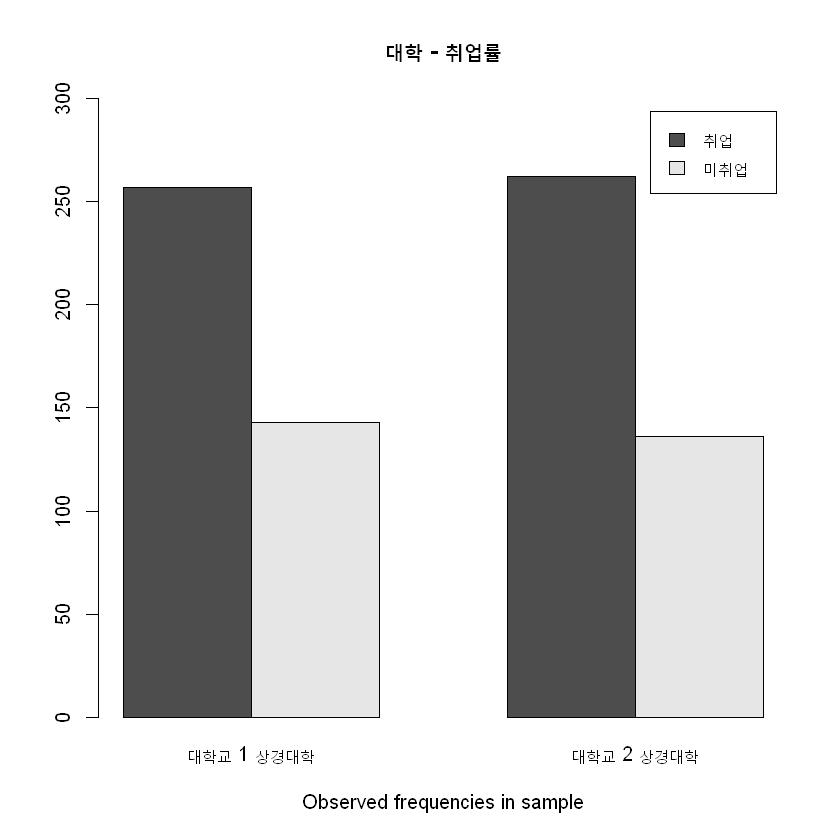

In [17]:
# Visualization

(barplot(t(obs), ylim = c(0, 300), beside = T, legend = T, main = "대학 - 취업률", xlab = "Observed frequencies in sample"))

**c. 각 상경대학의 전공별 취업, 미취업자수와 취업률은 다음과 같다.**
**d. 각 상경대학에서 전공별 취업률을 계산하여라.**

주어진 자료를 바탕으로 표를 채우고 전공별 취업률을 계산하면 다음과 같다. ('대학교 1'의 표본수 400, '대학교 2'의 표본수를 398로 하였음.)


In [11]:
# Assigning data

uni_1 <- matrix(c(126,74,97,53,34,16), nrow=3, ncol=2, byrow = T)
uni_2 <- matrix(c(31,19,96,54,135,63), nrow=3, ncol=2, byrow = T)

# 대학교 1 전공별 취업률
x <- c()
sum(uni_1[1,])
for (i in 1:3){
x[i] <- uni_1[i,1] / sum(uni_1[i,]) *100
}
x <- round(x,4)

# 대학교 2 전공별 취업률
y <- c()
for (i in 1:3){
y[i] <- uni_2[i,1] / sum(uni_2[i,]) *100
}
y <- round(y,4)

uni_1 <- cbind(uni_1, x)
dimnames(uni_1) <- list(c("경영학", "경제학", "응용통계학"), c("취업", "미취업", "취업률(%)"))
uni_1

uni_2 <- cbind(uni_2, x)
dimnames(uni_2) <- list(c("경영학", "경제학", "응용통계학"), c("취업", "미취업", "취업률(%)"))
uni_2


[1] 200

,취업,미취업,취업률(%)
경영학,126,74,63.0000
경제학,97,53,64.6667
응용통계학,34,16,68.0000


,취업,미취업,취업률(%)
경영학,31,19,63.0000
경제학,96,54,64.6667
응용통계학,135,63,68.0000


**e. 상경대학 간에 전공별로 취업률을 비교한 뒤, 이 고등학생의 선택에 어떠한 변화가 있을 것인지에 대해 논하여라.**

전체 상경대학의 취업률은 '대학교 1'이 64.25%, '대학교 2'가 65.8291%로 '대학교 2'가 근소하게 앞섰다. 따라서 전체 취업률을 비교하여 판단할 경우 이 고등학생은 '대학교 2'를 선택하였을 것이다. 그러나 각 대학의 상경대학 별 취업률은 '경영학' 63%, '경제학' 64.67%, '응용통계학' 68%로 두 대학이 동일했다. 즉, 두 대학의 각 상경대학의 모집단의 '취업'에 대한 분포는 동질하다. 따라서 이 고등학생이 어떤 대학을 선택하든 취업률은 무차별할 것이다. 

주어진 자료를 막대그래프로 나타내면 다음과 같다. '대학교 1'의 표본수는 '경영학', '경제학', '응용통계학' 순으로 많았고, '대학교 2'는 그 반대라는 점에서 두 집단의 자료는 차이를 보인다. 두 대학 전체 취업률의 차이는 이러한 표본수의 차이에 기인한다. 취업률이 상대적으로 낮은 '경영학'의 표본이 많은 '대학교 1'의 취업률이 취업률이 상대적으로 높은 '응용통계학'의 표본이 많은 '대학교 2'의 취업률보다 낮은 것이다. 

[1] 0.7 1.9 3.1

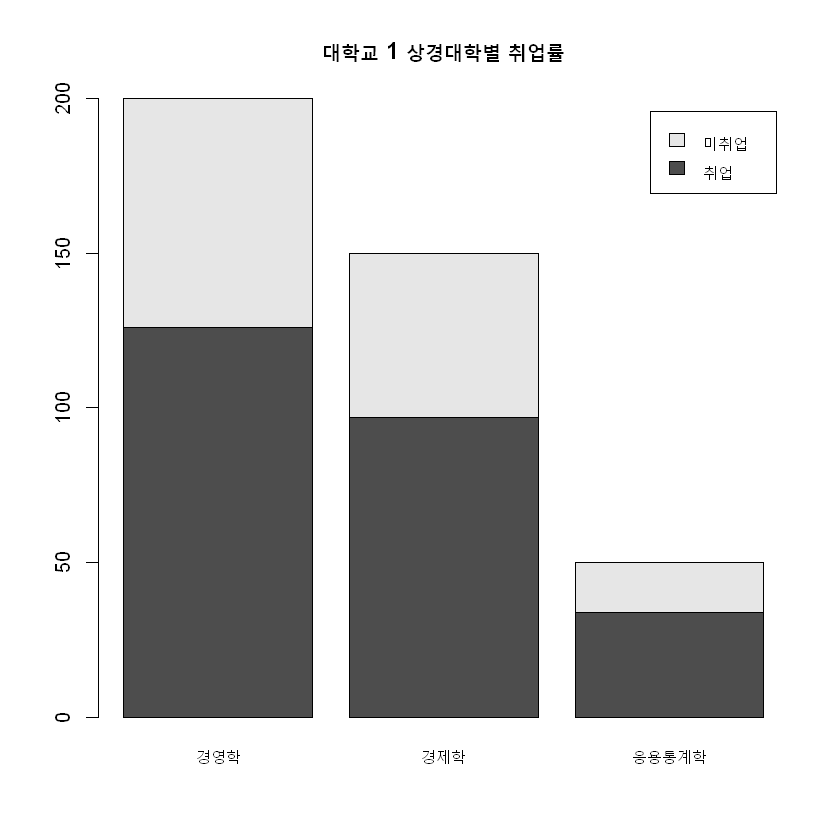

[1] 0.7 1.9 3.1

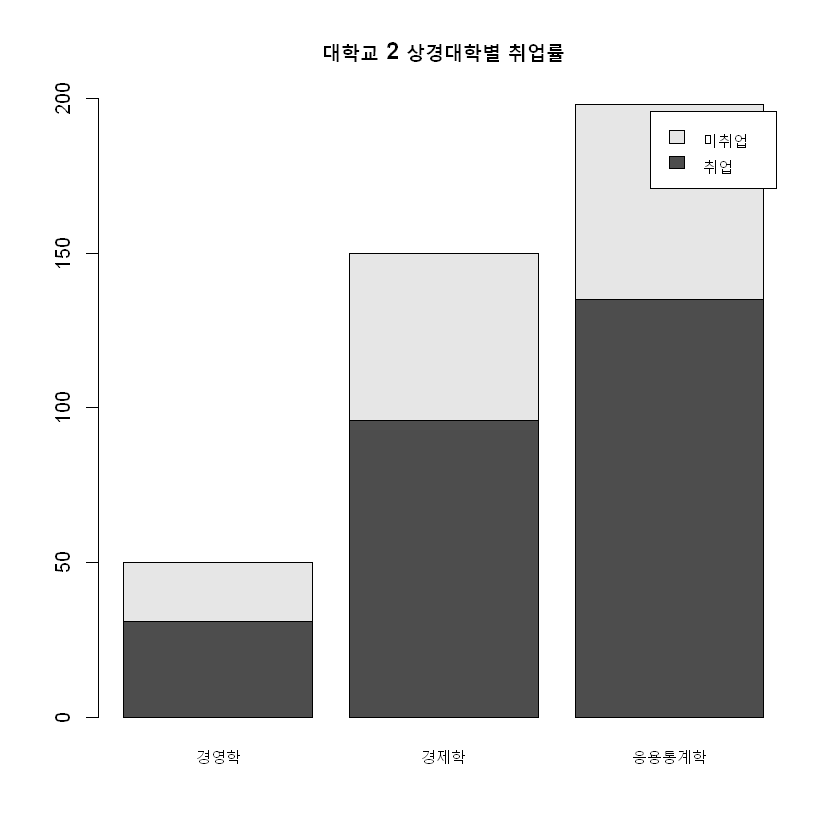

In [19]:
# Visualization

(uni_1.plot <- barplot(t(uni_1[,-3]),ylim = c(0,200), legend = T, main = "대학교 1 상경대학별 취업률" ))
(uni_2.plot <- barplot(t(uni_2[,-3]),ylim = c(0,200), legend = T, main = "대학교 2 상경대학별 취업률" ))

**f. 유의수준 5%에서 대학교 1의 상경대학에서 전공별로 취업률에 유의한 차이가 있는지 검정하여라.**

대학교 1의 상경대학 전공별로 취업률에 유의한 차이가 있는지 검정하기 위한 가설은 다음과 같이 설정할 수 있다.

***
H0: 세 집단 '경영학', '경제학', '응용통계학'의 '취업'에 대한 분포는 같다.

H1: 세 집단 '경영학', '경제학', '응용통계학'의 '취업'에 대한 분포는 다르다.
***

귀무가설이 참이라는 가정하에서 취업률과 미취업률을 추정하면 다음과 같다.

$$
\hat{p_{취업}} = \frac{(126+97+34)}{400}
$$

$$
\hat{p_{미취업}} = \frac{(74+53+16)}{400}
$$

In [20]:
# Probability

round(prob.yes <- sum(uni_1[,1])/400,4)
round(prob.no <- sum(uni_1[,2])/400,4)

[1] 0.6425

[1] 0.3575

각 전공별 표본수를 곱하여 구한 기댓값은 다음과 같다.

In [21]:
# Calculating exp

exp.bs <- c(prob.yes*200, prob.no*200)
exp.econ <- c(prob.yes*150, prob.no*150)
exp.stat <- c(prob.yes*50, prob.no*50)

exp.uni_1 <- rbind(exp.bs, exp.econ, exp.stat)
dimnames(exp.uni_1) <- list(c("경영학", "경제학", "응용통계학"), c("취업", "미취업"))
exp.uni_1

,취업,미취업
경영학,128.500,71.500
경제학,96.375,53.625
응용통계학,32.125,17.875


카이제곱합은 다음과 같다.

In [22]:
# Calculating chisq

obs.uni_1 <- uni_1[, -3]

chisq <- (obs.uni_1-exp.uni_1)^2/exp.uni_1
(sum.chisq <- sum(chisq))

[1] 0.4535024

p값을 구하면 다음과 같다.

In [23]:
# Calculating p.value

df <- (nrow(obs.uni_1)-1)*(ncol(obs.uni_1)-1)
round((p.value <- 1 - pchisq(sum.chisq,df)),4)

# Testing

(x <- chisq.test(obs.uni_1, correct=F))

[1] 0.7971


	Pearson's Chi-squared test

data:  obs.uni_1
X-squared = 0.4535, df = 2, p-value = 0.7971


p값은 0.7971이다. 따라서 유의수준 5%에서 귀무가설은 기각되지 않는다. 즉, 세 집단 '경영학', '경제학', '응용통계학'의 '취업'에 대한 분포는 같지 않다고 볼 수 없다. 

주어진 자료를 막대그래프로 나타내면 전공에 **관계없이** '취업' 표본수가 '미취업' 표본수보다 많다는 점을 확인할 수 있다. 따라서 전공과 취업률 간에는 일정한 관련성이 없으며, 각 전공별 취업률에는 유의한 차이가 없다는 결론을 내릴 수 있다. 

1.5,4.5,7.5
2.5,5.5,8.5


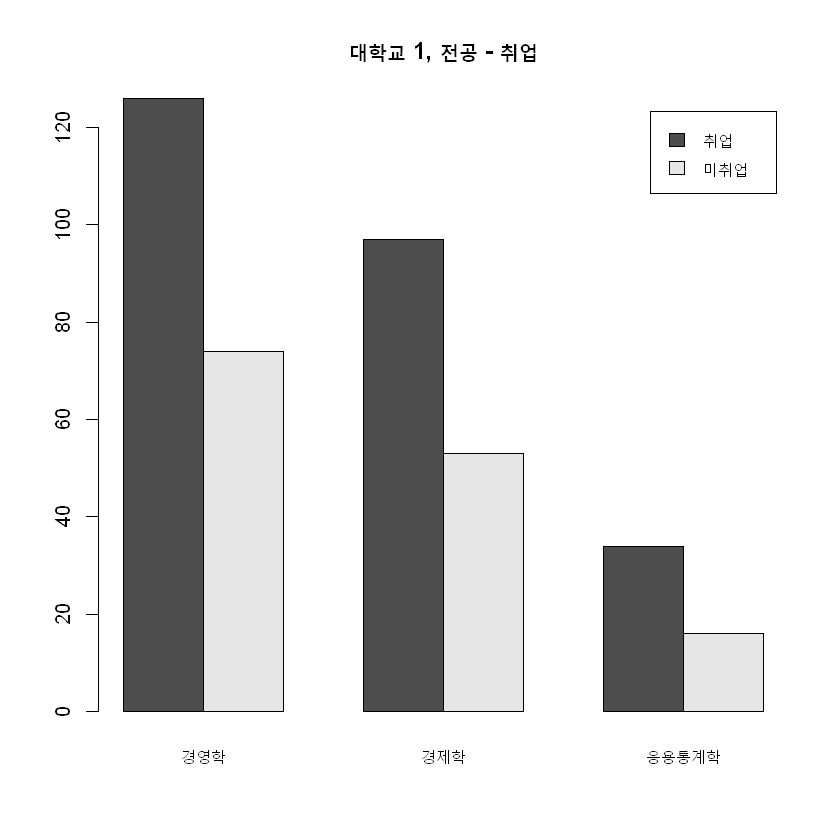

In [26]:
# Visualization

(barplot(t(obs.uni_1), beside = T, legend = T, main = "대학교 1, 전공 - 취업"))

**g. 유의수준 5%에서 대학교 2의 상경대학에서 전공별로 취업률에 유의한 차이가 있는지 검정하여라.**

대학교 2의 상경대학 전공별로 취업률에 유의한 차이가 있는지 검정하기 위한 가설은 다음과 같이 설정할 수 있다.

***
H0: 세 집단 '경영학', '경제학', '응용통계학'의 '취업'에 대한 분포는 같다.

H1: 세 집단 '경영학', '경제학', '응용통계학'의 '취업'에 대한 분포는 다르다.
***


귀무가설이 참이라는 가정하에서 취업률과 미취업률을 추정하면 다음과 같다.

$$
\hat{p_{취업}} = \frac{(31+96+135)}{398}
$$

$$
\hat{p_{미취업}} = \frac{(19+54+63)}{398}
$$

In [27]:
# Probability

round(prob.yes <- sum(uni_2[,1])/398,4)
round(prob.no <- sum(uni_2[,2])/398,4)

[1] 0.6583

[1] 0.3417

각 전공별 표본수를 곱하여 구한 기댓값은 다음과 같다.

In [28]:
# Calculating exp

exp.bs <- c(prob.yes*50, prob.no*50)
exp.econ <- c(prob.yes*150, prob.no*150)
exp.stat <- c(prob.yes*198, prob.no*198)

exp.uni_2 <- rbind(exp.bs, exp.econ, exp.stat)
dimnames(exp.uni_2) <- list(c("경영학", "경제학", "응용통계학"), c("취업", "미취업"))
exp.uni_2

,취업,미취업
경영학,32.91457,17.08543
경제학,98.74372,51.25628
응용통계학,130.34171,67.65829


카이제곱합은 다음과 같다.

In [29]:
# Calculating chisq

obs.uni_2 <- uni_2[, -3]

chisq <- (obs.uni_2 - exp.uni_2)^2/exp.uni_2
(sum.chisq <- sum(chisq))

[1] 1.036226

p값을 구하면 다음과 같다.

In [30]:
# Calculating p.value

df <- (nrow(obs.uni_2)-1)*(ncol(obs.uni_2)-1)
round((p.value <- 1 - pchisq(sum.chisq,df)),4)

# Testing

(x <- chisq.test(obs.uni_2, correct=F))

[1] 0.5956


	Pearson's Chi-squared test

data:  obs.uni_2
X-squared = 1.0362, df = 2, p-value = 0.5956


p값은 0.5956이다. 따라서 유의수준 5%에서 귀무가설은 기각되지 않는다. 즉, 세 집단 '경영학', '경제학', '응용통계학'의 '취업'에 대한 분포는 같지 않다고 볼 수 없다. 

주어진 자료를 막대그래프로 나타내면 전공에 **관계없이** '취업' 표본수가 '미취업' 표본수보다 많다는 점을 확인할 수 있다. 따라서 '대학교 1'의 경우와 마찬가지로 전공과 취업률 간에는 일정한 관련성이 없으며, 각 전공별 취업률에는 유의한 차이가 없다는 결론을 내릴 수 있다. 

1.5,4.5,7.5
2.5,5.5,8.5


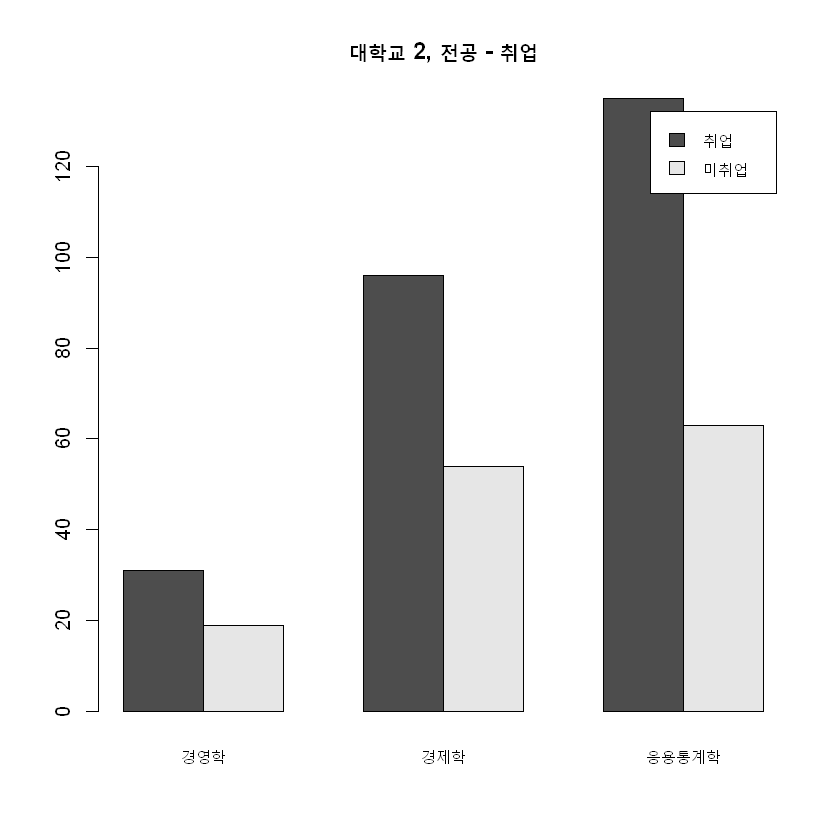

In [31]:
# Visualization

(barplot(t(obs.uni_2), beside = T, legend = T, main = "대학교 2, 전공 - 취업"))